This K-means clustering algorithm is based off of the research paper "Research on K-Means Clustering Algorithm: An Improved K-Means Clustering Algorithm" written by Shi Na, Guan Yong, Liu Xumin. This algorithm was chosen to be used for the color detector of pixels on a screen in a Visible Light Communication (VLC) protocol for vehicular networks as a Proof-of-Following concept. (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5453745)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import random
import math

In [2]:
def rebound_data_point(data_point):
    # ensure that the values of rgb cannot exceed their limits
    r = data_point[0]
    g = data_point[1]
    b = data_point[2]
    if r < 0:
      dif = abs(r)
      data_point[0] = dif
    elif r > 255:
      dif = abs(r - 255)
      data_point[0] = r - dif
    if g < 0:
      dif = abs(g)
      data_point[1] = dif
    elif g > 255:
      dif = abs(g - 255)
      data_point[1] = g - dif
    if b < 0:
      dif = abs(b)
      data_point[2] = dif
    elif b > 255:
      dif = abs(b - 255)
      data_point[2] = b - dif
    return data_point

In [3]:
def generate_data():
  # three dimensional vector whose first index corresponds to r, second to g, third to b
  # we want three 3-dimensional gaussians centered around the strict values of the colors
  # abosolute red, absolute green, absolute blue, and absolute white
  red_mean = np.array([255, 0, 0])
  green_mean = np.array([0, 255, 0])
  blue_mean = np.array([0, 0, 255])
  white_mean = np.array([255, 255, 255]) # shape (3,)
  covar = np.array([[1000,0,0],[0,1000,0],[0,0,1000]])
  # generating multivariate data
  # will have to look more into what is an appropriate covariance to chose
  red_data = np.random.multivariate_normal(red_mean, covar, size = 100)
  green_data = np.random.multivariate_normal(green_mean, covar, size = 100)
  blue_data = np.random.multivariate_normal(blue_mean, covar, size = 100)
  white_data = np.random.multivariate_normal(white_mean, covar, size = 100)
  corrected_data = []
  target = []
  # data correction happens here
  for data_point in red_data:
    corrected_data.append(rebound_data_point(data_point))
    target.append(1)
  for data_point in green_data:
    corrected_data.append(rebound_data_point(data_point))
    target.append(2)
  for data_point in blue_data:
    corrected_data.append(rebound_data_point(data_point))
    target.append(3)
  for data_point in white_data:
    corrected_data.append(rebound_data_point(data_point))
    target.append(4)
  data = np.array(corrected_data)
  target = np.array(target)
  # go through and make sure there are no data points above corresponding color 
  # 255 or below the 0s
  # green_data = green_data.transpose()
  # blue_data = blue_data.transpose()
  # white_data = white_data.transpose()
  return data, target
  # return np.concatenate((red_data, green_data, blue_data, white_data), axis=1)


  # why is white data so bad???????


In [4]:
def scatter_plot(data):
  data = data.T
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter3D(data[[0], :], data[[1], :], data[[2], :], color = "blue")
  plt.title("3D scatter plot")
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')

  plt.show()

In [5]:
data, target = generate_data()
print(data.T.shape)
print(data.T)

(3, 400)
[[255.         250.81683857 241.46956245 ... 255.         238.63426989
  255.        ]
 [ 21.45396287  51.8946034    8.70007397 ... 255.         245.12330702
  255.        ]
 [ 49.76325371  31.05443399  71.85570004 ... 217.02858843 255.
  225.77113813]]


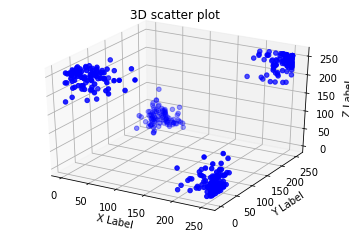

In [6]:
scatter_plot(data)

In [7]:
def euclidean_distance(point1, point2):
  # assuming the points are numpy vectors
  assert point1.shape == point2.shape
  distance = 0
  for i in range(point1.shape[0]):
    distance += (point1[i] - point2[i])**2
  return math.sqrt(distance)


In [8]:
def k_means_clustering(data, k):
  # data takes the form of (r value, g value, b value), and its respective label is
  # 0 = red, 1 = green, 2 = blue, 3 = white
  # Randomly select k objects from dataset D as initial cluster centers
  
  random_samples = random.sample(range(0, data.shape[0]), k)
  cluster_dict = {
      0: [],
      1: [],
      2: [],
      3: [],
      'label0': 0,
      'label1': 1,
      'label2': 2,
      'label3': 3
  }

  clusters = []
  i = 0
  for i in range(k):
    clusters.append(data[random_samples[i]])
  
  # Calculate the distance between each data object di (1 <=
  # i<=n ) and all k cluster centers cj (1<=j<=k) as Euclidean
  # distance d(di , cj) and assign data object di to the nearest cluster
  # For each data object di, find the closest center cj and
  # assign di to cluster center j;
  clustered_data = []
  for data_point in data:
    i = 0
    closest_cluster = k + 1
    for i in range(len(clusters)):
      # first iteration
      if i == 0:
        min_dist = euclidean_distance(data_point, clusters[i])
        closest_cluster = 0
      dist = euclidean_distance(data_point, clusters[i])
      # if smaller distance found
      if dist < min_dist:
        min_dist == dist
        closest_cluster = i
      i += 1
    cluster_dict[closest_cluster].append(data_point)
  
  # Store the label of cluster center in which data object di is
  # and the distance of data object di to the nearest cluster and store
  # them in array Cluster[ ] and the Dist[ ] separately.
  # Set Cluster[i]=j, j is the label of nearest cluster.
  # Set Dist[i]=d(di, cj), d(di, cj) is the nearest Euclidean
  # distance to the closest center

  pass

In [9]:
k_means_clustering(data, k=4)